In [5]:
# 04_compare_correlation_spread_HER2.ipynb

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid")

In [8]:
# Load the dataset for the H2170 lung cancer cell line
# We call its container "df_cell", which stands for dataFrame of the cell line that holds all of the single-cell protein measurements
df_cell = pd.read_csv('/Users/22holleranm/DATA_481_766_protein_networks/shared_team_files/lung_cancer.csv', index_col=0)

# Display the first few rows
df_cell.head()

,01_cMyc_nuc_mean,01_BRD4_nuc_mean,01_CDK2_nuc_mean,02_HER2_nuc_mean,02_CyclinD1_nuc_mean,02_EGFR_nuc_mean,03_FGFR2_nuc_mean,03_CDC6_nuc_mean,03_EZH2_nuc_mean,04_cMycS62_nuc_mean,04_FOXO1_nuc_mean,04_HER2_nuc_mean,05_cMycT58_nuc_mean,05_CyclinA_nuc_mean,05_CyclinB1_nuc_mean,06_FOXO3A_nuc_mean,06_AKT_nuc_mean,06_ZEB1_nuc_mean,07_pRb_S807811_nuc_mean,07_Rb_nuc_mean,07_p21_nuc_mean,08_CDT1_nuc_mean,08_MDM2_nuc_mean,09_SKP2_nuc_mean,09_mTOR_nuc_mean,10_TGFbeta_nuc_mean,10_E2F1_nuc_mean,11_cFOS_nuc_mean,11_CDH1_nuc_mean,12_EZH2_nuc_mean,12_cPARP_nuc_mean,01_cMyc_ring_mean,01_BRD4_ring_mean,01_CDK2_ring_mean,02_HER2_ring_mean,02_CyclinD1_ring_mean,02_EGFR_ring_mean,03_FGFR2_ring_mean,03_CDC6_ring_mean,03_EZH2_ring_mean,04_cMycS62_ring_mean,04_FOXO1_ring_mean,04_HER2_ring_mean,05_cMycT58_ring_mean,05_CyclinA_ring_mean,05_CyclinB1_ring_mean,06_FOXO3A_ring_mean,06_AKT_ring_mean,06_ZEB1_ring_mean,07_pRb_S807811_ring_mean,07_Rb_ring_mean,07_p21_ring_mean,08_CDT1_ring_mean,08_MDM2_ring_mean,09_SKP2_ring_mean,09_mTOR_ring_mean,10_TGFbeta_ring_mean,10_E2F1_ring_mean,11_cFOS_ring_mean,11_CDH1_ring_mean,12_EZH2_ring_mean,12_cPARP_ring_mean
index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,0.996370,-0.217049,-0.177764,0.109605,1.356144,0.482767,-0.536020,-0.987532,-0.897249,0.243860,-0.927233,-0.002703,0.406510,-0.457381,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,1.406970,-0.434054,-0.922134,0.300361,0.737689,0.626121,0.519019,0.448048,0.108275,0.868095,1.319311,0.076730,-0.006708,0.263158,1.385566,0.719334,-0.402828,-1.048042,-0.925909,0.334180,-0.284215,1.325648,0.513783,-0.151589,0.874221,0.929768,0.446487,1.270743,1.188206,0.365427,1.164822,1.464958,-0.378041,-0.906202,0.209302,0.589119,0.940516,0.368686
cell_31,0.545061,0.302935,0.875525,0.416186,-0.523494,-0.444546,-0.218084,0.560125,0.388460,0.624579,-0.696834,-0.698082,0.404130,0.377436,0.506497,0.032809,-0.538555,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,0.917627,-0.004364,-0.017985,0.250767,0.057809,1.478013,0.019616,0.485509,0.248573,0.915782,0.890622,-0.143222,-0.101312,0.144229,1.156873,0.543466,-0.333130,-0.913026,-0.713302,0.266901,0.122589,1.330254,0.379366,-0.188642,0.686795,0.582482,0.476434,0.979811,0.417119,0.159226,1.409255,1.360996,-0.186646,-0.669842,0.128295,0.240999,0.956225,0.188836
cell_36,0.478836,-0.622209,-0.316807,0.273643,-0.855136,-0.445459,-0.495221,0.306739,-0.401794,0.390856,-0.824935,-0.611346,-0.104029,-0.369246,-0.081758,0.202629,-0.745466,-0.057875,0.507749,0.167409,0.202370,-0.516313,-0.422799,1.228007,0.500917,0.007855,-0.462886,-0.072239,-0.370941,0.222873,-0.226078,0.010196,-0.094905,-0.103745,0.236957,-0.593180,-0.307542,-0.419718,0.570195,-0.181529,-0.053759,-0.641108,-0.577423,-0.191195,-0.458681,0.032330,-0.024514,-0.642016,-0.014706,0.181128,-0.018302,0.199695,-0.165359,-0.282927,0.601053,0.460337,0.176087,-0.256244,-0.202937,-0.290657,0.158839,-0.211352
cell_43,-0.747665,-1.171727,-0.779043,-0.258488,-1.004050,-0.582779,-0.864614,-0.471185,-0.527605,-0.821571,-0.864645,-0.990543,-0.607014,-0.717098,-0.687771,0.153157,-0.843331,-0.112361,0.669902,0.363792,-0.009721,-0.684535,-0.385856,0.154523,0.359326,-0.237356,-0.532523,-0.709584,-0.514982,-0.161593,-0.454719,-0.630292,-0.822400,-0.832541,-0.554567,-0.941967,-0.596149,-1.019525,-0.729150,-0.704892,-0.751484,-0.915185,-0.971186,-0.599293,-1.009942,-0.901189,-0.389840,-0.950625,-0.224062,-0.203456,-0.321853,-0.140230,-0.670966,-0.392751,-0.139191,-0.018206,-0.421827,-0.582895,-0.898908,-0.599372,-0.398471,-0.556434
cell_51,-0.969321,-0.830915,-0.439126,0.909262,-0.538657,1.243933,-0.292941,-0.317952,0.356104,-1.060728,-0.793165,0.505676,-0.859886,-0.976564,-0.010725,-0.142979,0.121853,1.201399,-1.370445,-1.067327,0.643206,-0.438881,1.183240,-0.800889,0.762989,-0.426352,-0.661457,0.552717,0.289812,-0.649461,0.332243,-0.781621,-0.739925,-0.295508,-0.289053,-0.793799,0.237827,-0.965990,-0.56011

In [9]:
# Combining HER2 measurements from nuclear and cytoplasmic intensities

# Set up containers for combined HER2 intensities
combined_HER2_intensity_02 = []
combined_HER2_intensity_04 = []

# Load your data
data = df_cell  # Use the main dataset

# Define the HER2 conditions for each fluorophore/antibody, for iteration 2 and 4
conditions_02 = ['02_HER2_nuc_mean', '02_HER2_ring_mean']
conditions_04 = ['04_HER2_nuc_mean', '04_HER2_ring_mean']

# Compute combined HER2 intensities for iteration 02
for i in data.index:
    # Average nuclear and cytoplasmic HER2 measurements
    tmp = (data.loc[i, '02_HER2_nuc_mean'] + data.loc[i, '02_HER2_ring_mean']) / 2
    combined_HER2_intensity_02.append(tmp)

# Compute combined HER2 intensities for iteration 04
for i in data.index:
    tmp = (data.loc[i, '04_HER2_nuc_mean'] + data.loc[i, '04_HER2_ring_mean']) / 2
    combined_HER2_intensity_04.append(tmp)

# Add the combined HER2 intensities as new columns in the dataset
data['02_HER2_combined'] = combined_HER2_intensity_02
data['04_HER2_combined'] = combined_HER2_intensity_04

all_nuc_or_cyt = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '03_EZH2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '12_EZH2_nuc_mean', '12_cPARP_nuc_mean']

selection = all_nuc_or_cyt

In [10]:
# Iteration 02

# Dataset and HER2 condition column
data = df_cell
cond = '02_HER2_combined'  # Column representing HER2 combined expression

# Identify the top and bottom 10% of HER2 expression
top_10_percent = data[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = data[cond].quantile(0.1)  # Value at the 10th percentile

# Add a new column to label the HER2 groups
data['HER2_Group'] = 'Middle'  # Default to 'Middle' group
data.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
data.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Verify the new column and data
print("Updated dataset with HER2 groups:")
print(data[['HER2_Group', cond]].head())  # Display the HER2 group and condition

data_high = data[data.HER2_Group=='High HER2'].drop('HER2_Group',axis=1)[selection]
data_low = data[data.HER2_Group=='Low HER2'].drop('HER2_Group',axis=1)[selection]

# Compute correlation coefficients for HER2 High and Low groups
correlations_high = data_high.corr().values.flatten()
correlations_low = data_low.corr().values.flatten()

correlations_high = correlations_high[~np.isnan(correlations_high)]
correlations_low = correlations_low[~np.isnan(correlations_low)]
correlations_high_02 = correlations_high[correlations_high != 1]
correlations_low_02 = correlations_low[correlations_low != 1]

Updated dataset with HER2 groups:
             HER2_Group  02_HER2_combined
index_column                             
cell_24       High HER2          1.157840
cell_31       High HER2          0.653404
cell_36          Middle          0.255300
cell_43          Middle         -0.406528
cell_51          Middle          0.310104


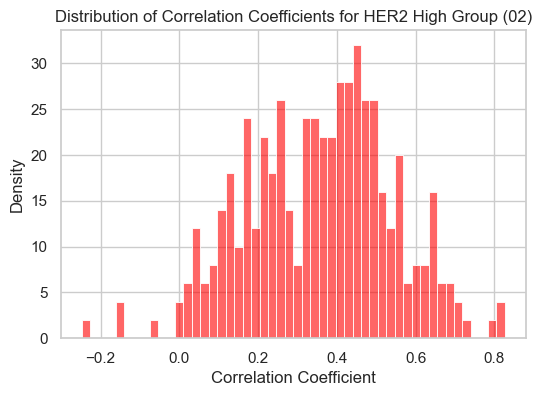

In [11]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_02, bins=50, color='red', alpha=0.6, label='HER2 High (02)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for HER2 High Group (02)')
plt.show()

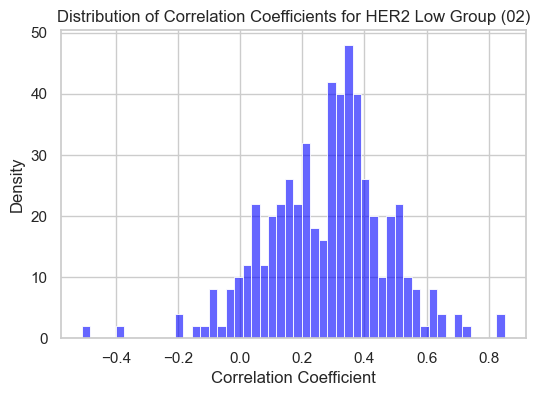

In [14]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_low_02, bins=50, color='blue', alpha=0.6, label='HER2 Low (02)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for HER2 Low Group (02)')
plt.show()

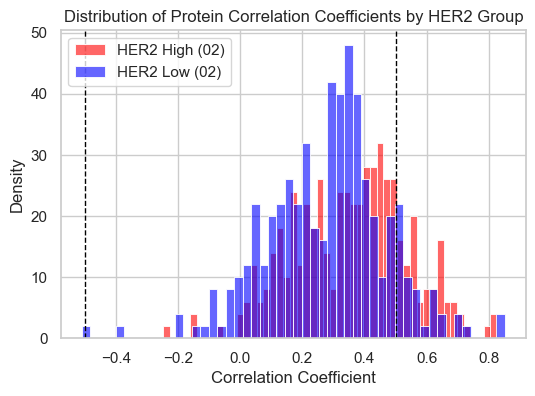

In [74]:
# Plot distributions together
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_02, bins=50, color='red', alpha=0.6, label='HER2 High (02)')
sns.histplot(correlations_low_02, bins=50, color='blue', alpha=0.6, label='HER2 Low (02)')
plt.axvline(-0.5, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0.5, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Protein Correlation Coefficients by HER2 Group')
plt.legend(loc='upper left')
plt.show()

In [21]:
# Compute and compare the spread of correlations
minmax_high_02 = [min(correlations_high_02), max(correlations_high_02)]
minmax_low_02 = [min(correlations_low_02), max(correlations_low_02)]
range_high_02 = minmax_high_02[1] - minmax_high_02[0]
range_low_02 = minmax_low_02[1] - minmax_low_02[0]

print("Spread of correlation coefficients (min and max):")
print(f"HER2 High (02): {minmax_high_02}")
print(f"HER2 Low (02): {minmax_low_02}")

print("Spread of correlation coefficients (range):")
print(f"HER2 High (02): {range_high_02}")
print(f"HER2 Low (02): {range_low_02}")

spread_high_02 = np.percentile(correlations_high_02, [5, 95])
spread_low_02 = np.percentile(correlations_low_02, [5, 95])

print("Spread of correlation coefficients (5th to 95th percentile):")
print(f"HER2 High (02): {spread_high_02}")
print(f"HER2 Low (02): {spread_low_02}")

range_high_02 = spread_high_02[1] - spread_high_02[0]
range_low_02 = spread_low_02[1] - spread_low_02[0]

print("Spread of correlation coefficients (percentile range):")
print(f"HER2 High (02): {range_high_02}")
print(f"HER2 Low (02): {range_low_02}")

Spread of correlation coefficients (min and max):
HER2 High (02): [-0.24744071640969378, 0.8259534658144779]
HER2 Low (02): [-0.5085920848937316, 0.8509666890619747]
Spread of correlation coefficients (range):
HER2 High (02): 1.0733941822241717
HER2 Low (02): 1.3595587739557065
Spread of correlation coefficients (5th to 95th percentile):
HER2 High (02): [0.04914321 0.6479605 ]
HER2 Low (02): [-0.03693813  0.55849465]
Spread of correlation coefficients (percentile range):
HER2 High (02): 0.5988172856018084
HER2 Low (02): 0.5954327804695503


In [23]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.6):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_02 = calculate_extreme_fraction(correlations_high_02)
extreme_fraction_low_02 = calculate_extreme_fraction(correlations_low_02)

print("Fraction of extreme correlations (|r| > 0.6):")
print(f"HER2 High (02): {extreme_fraction_high_02:.3%}")
print(f"HER2 Low (02): {extreme_fraction_low_02:.3%}")

Fraction of extreme correlations (|r| > 0.6):
HER2 High (02): 8.696%
HER2 Low (02): 3.986%


In [25]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.5):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_02 = calculate_extreme_fraction(correlations_high_02)
extreme_fraction_low_02 = calculate_extreme_fraction(correlations_low_02)

print("Fraction of extreme correlations (|r| > 0.5):")
print(f"HER2 High (02): {extreme_fraction_high_02:.3%}")
print(f"HER2 Low (02): {extreme_fraction_low_02:.3%}")

Fraction of extreme correlations (|r| > 0.5):
HER2 High (02): 20.652%
HER2 Low (02): 11.957%


In [27]:
# Iteration 04

# Dataset and HER2 condition column
data = df_cell
cond = '04_HER2_combined'  # Column representing HER2 combined expression

# Identify the top and bottom 10% of HER2 expression
top_10_percent = data[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = data[cond].quantile(0.1)  # Value at the 10th percentile

# Add a new column to label the HER2 groups
data['HER2_Group'] = 'Middle'  # Default to 'Middle' group
data.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
data.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Verify the new column and data
print("Updated dataset with HER2 groups:")
print(data[['HER2_Group', cond]].head())  # Display the HER2 group and condition

data_high = data[data.HER2_Group=='High HER2'].drop('HER2_Group',axis=1)[selection]
data_low = data[data.HER2_Group=='Low HER2'].drop('HER2_Group',axis=1)[selection]

# Compute correlation coefficients for HER2 High and Low groups
correlations_high = data_high.corr().values.flatten()
correlations_low = data_low.corr().values.flatten()

correlations_high = correlations_high[~np.isnan(correlations_high)]
correlations_low = correlations_low[~np.isnan(correlations_low)]
correlations_high_04 = correlations_high[correlations_high != 1]
correlations_low_04 = correlations_low[correlations_low != 1]

Updated dataset with HER2 groups:
             HER2_Group  04_HER2_combined
index_column                             
cell_24        Low HER2         -0.911579
cell_31          Middle         -0.705692
cell_36          Middle         -0.594384
cell_43        Low HER2         -0.980865
cell_51          Middle          0.153675


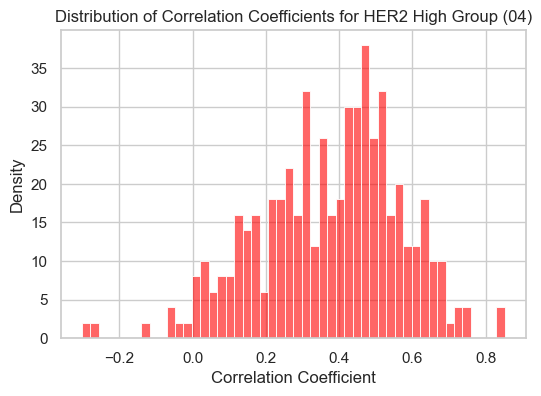

In [29]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_04, bins=50, color='red', alpha=0.6, label='HER2 High (04)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for HER2 High Group (04)')
plt.show()

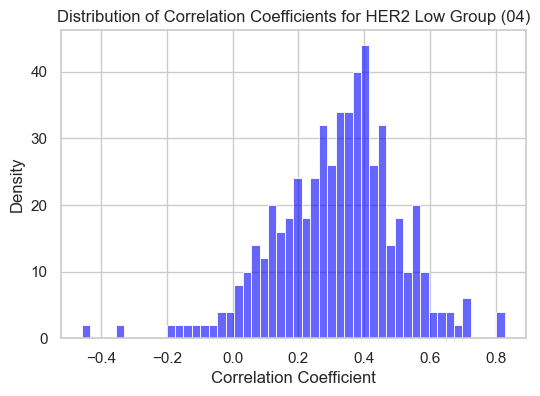

In [31]:
# Plot distributions of correlation coefficients high group
plt.figure(figsize=(6, 4))
sns.histplot(correlations_low_04, bins=50, color='blue', alpha=0.6, label='HER2 Low (04)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Correlation Coefficients for HER2 Low Group (04)')
plt.show()

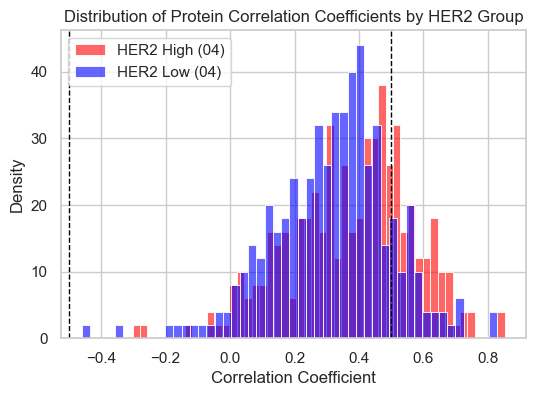

In [82]:
# Plot distributions together
plt.figure(figsize=(6, 4))
sns.histplot(correlations_high_04, bins=50, color='red', alpha=0.6, label='HER2 High (04)')
sns.histplot(correlations_low_04, bins=50, color='blue', alpha=0.6, label='HER2 Low (04)')
plt.axvline(-0.5, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0.5, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Protein Correlation Coefficients by HER2 Group')
plt.legend(loc = "upper left")
plt.show()

In [35]:
# Compute and compare the spread of correlations
minmax_high_04 = [min(correlations_high_04), max(correlations_high_04)]
minmax_low_04 = [min(correlations_low_04), max(correlations_low_04)]
range_high_04 = minmax_high_04[1] - minmax_high_04[0]
range_low_04 = minmax_low_04[1] - minmax_low_04[0]

print("Spread of correlation coefficients (min and max):")
print(f"HER2 High (04): {minmax_high_04}")
print(f"HER2 Low (04): {minmax_low_04}")

print("Spread of correlation coefficients (range):")
print(f"HER2 High (04): {range_high_04}")
print(f"HER2 Low (04): {range_low_04}")

spread_high_04 = np.percentile(correlations_high_04, [5, 95])
spread_low_04 = np.percentile(correlations_low_04, [5, 95])

print("Spread of correlation coefficients (5th to 95th percentile):")
print(f"HER2 High (04): {spread_high_04}")
print(f"HER2 Low (04): {spread_low_04}")

range_high_04 = spread_high_04[1] - spread_high_04[0]
range_low_04 = spread_low_04[1] - spread_low_04[0]

print("Spread of correlation coefficients (percentile range):")
print(f"HER2 High (04): {range_high_04}")
print(f"HER2 Low (04): {range_low_04}")

Spread of correlation coefficients (min and max):
HER2 High (04): [-0.30222989248273635, 0.8517934929626595]
HER2 Low (04): [-0.45915623767063163, 0.8277206989453113]
Spread of correlation coefficients (range):
HER2 High (04): 1.1540233854453958
HER2 Low (04): 1.286876936615943
Spread of correlation coefficients (5th to 95th percentile):
HER2 High (04): [0.03603001 0.65905806]
HER2 Low (04): [0.02294851 0.58910647]
Spread of correlation coefficients (percentile range):
HER2 High (04): 0.6230280414445164
HER2 Low (04): 0.5661579560279153


In [37]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.6):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_04 = calculate_extreme_fraction(correlations_high_04)
extreme_fraction_low_04 = calculate_extreme_fraction(correlations_low_04)

print("Fraction of extreme correlations (|r| > 0.6):")
print(f"HER2 High (04): {extreme_fraction_high_04:.3%}")
print(f"HER2 Low (04): {extreme_fraction_low_04:.3%}")

Fraction of extreme correlations (|r| > 0.6):
HER2 High (04): 11.232%
HER2 Low (04): 4.348%


In [39]:
# Compare absolute correlations to determine extremity
def calculate_extreme_fraction(correlations, threshold=0.5):
    return np.mean(abs(correlations) > threshold)

extreme_fraction_high_04 = calculate_extreme_fraction(correlations_high_04)
extreme_fraction_low_04 = calculate_extreme_fraction(correlations_low_04)

print("Fraction of extreme correlations (|r| > 0.5):")
print(f"HER2 High (04): {extreme_fraction_high_04:.3%}")
print(f"HER2 Low (04): {extreme_fraction_low_04:.3%}")

Fraction of extreme correlations (|r| > 0.5):
HER2 High (04): 26.812%
HER2 Low (04): 14.493%


Text(0, 0.5, 'Protein Correlations for High HER2 Expression (04)')

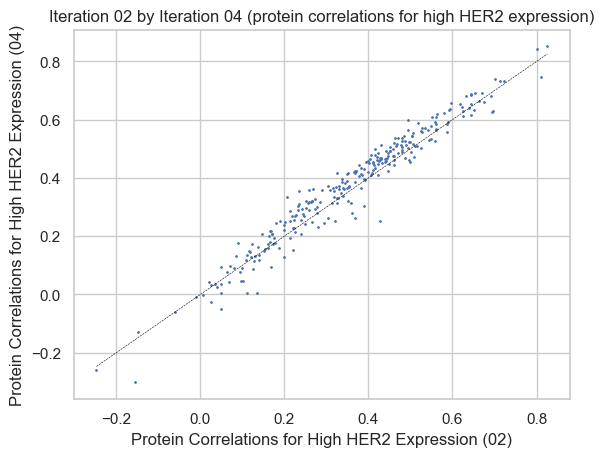

In [109]:
#Creating scatterplot to look at relationship between high HER2 correlations for Iteration 02 and 04

plt.scatter(correlations_high_02, correlations_high_04, s=0.5)
x_line = np.array([min(correlations_high_02), max(correlations_high_02)])
y_line = 1 * x_line
plt.plot(x_line, y_line, color='black', linewidth=0.4,linestyle='dashed')
plt.title("Iteration 02 by Iteration 04 (protein correlations for high HER2 expression)")
plt.xlabel("Protein Correlations for High HER2 Expression (02)")
plt.ylabel("Protein Correlations for High HER2 Expression (04)")

Text(0, 0.5, 'Protein Correlations for Low HER2 Expression (04)')

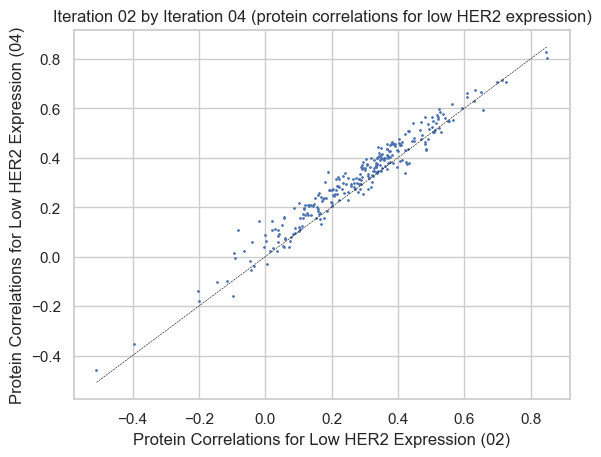

In [111]:
#Creating scatterplot to look at relationship between low HER2 correlations for Iteration 02 and 04

plt.scatter(correlations_low_02, correlations_low_04, s=0.5)
x_line = np.array([min(correlations_low_02), max(correlations_low_02)])  # Use the range of x values from the scatter plot
y_line = 1 * x_line
plt.plot(x_line, y_line, color='black', linewidth=0.4,linestyle='dashed')
plt.title("Iteration 02 by Iteration 04 (protein correlations for low HER2 expression)")
plt.xlabel("Protein Correlations for Low HER2 Expression (02)")
plt.ylabel("Protein Correlations for Low HER2 Expression (04)")

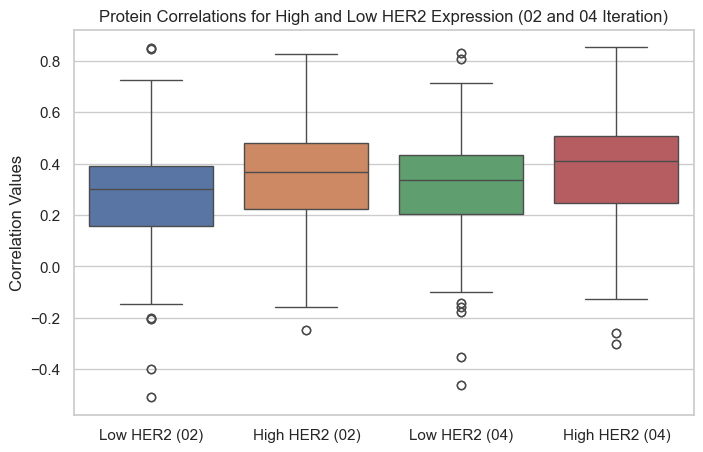

In [85]:
#Creating boxplot to look at relationship for low and high HER2 correlations for Iteration 02 and 04

boxes = [correlations_low_02, correlations_high_02, correlations_low_04, correlations_high_04]

labels = ["Low HER2 (02)", "High HER2 (02)", "Low HER2 (04)", "High HER2 (04)"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=boxes)

plt.xticks(ticks=range(4), labels=labels)
plt.title("Protein Correlations for High and Low HER2 Expression (02 and 04 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

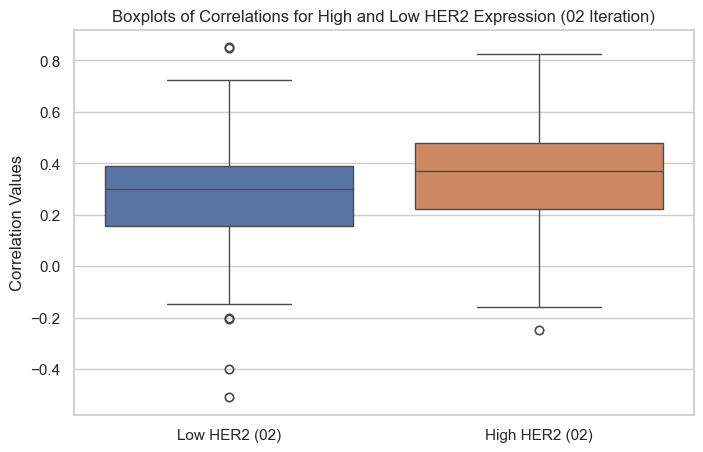

In [47]:
#Creating boxplot to look at relationship for low and high HER2 correlations for Iteration 02

boxes1 = [correlations_low_02, correlations_high_02]

labels1 = ["Low HER2 (02)", "High HER2 (02)"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=boxes1)

plt.xticks(ticks=range(2), labels=labels1)
plt.title("Boxplots of Correlations for High and Low HER2 Expression (02 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

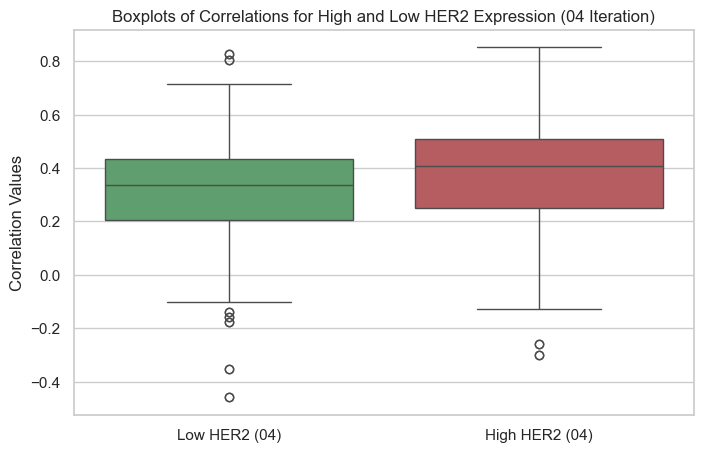

In [49]:
#Creating boxplot to look at relationship for low and high HER2 correlations for Iteration 04

boxes2 = [correlations_low_04, correlations_high_04]

labels2 = ["Low HER2 (04)", "High HER2 (04)"]

default_colors = sns.color_palette("deep")
green_color = default_colors[2]
red_color = default_colors[3]

plt.figure(figsize=(8, 5))
sns.boxplot(data=boxes2, palette=[green_color, red_color])

plt.xticks(ticks=range(2), labels=labels2)
plt.title("Boxplots of Correlations for High and Low HER2 Expression (04 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

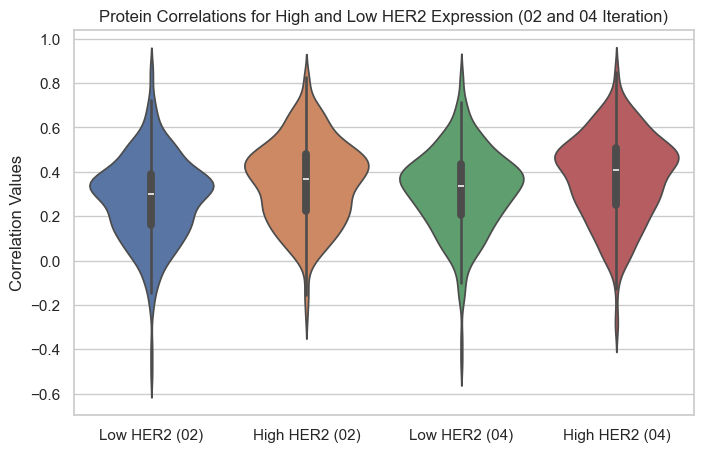

In [87]:
#Creating violin plot to look at relationship for low and high HER2 correlations for Iteration 02 and 04

violins = [correlations_low_02, correlations_high_02, correlations_low_04, correlations_high_04]

labels = ["Low HER2 (02)", "High HER2 (02)", "Low HER2 (04)", "High HER2 (04)"]

plt.figure(figsize=(8, 5))
sns.violinplot(data=boxes)

plt.xticks(ticks=range(4), labels=labels)
plt.title("Protein Correlations for High and Low HER2 Expression (02 and 04 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

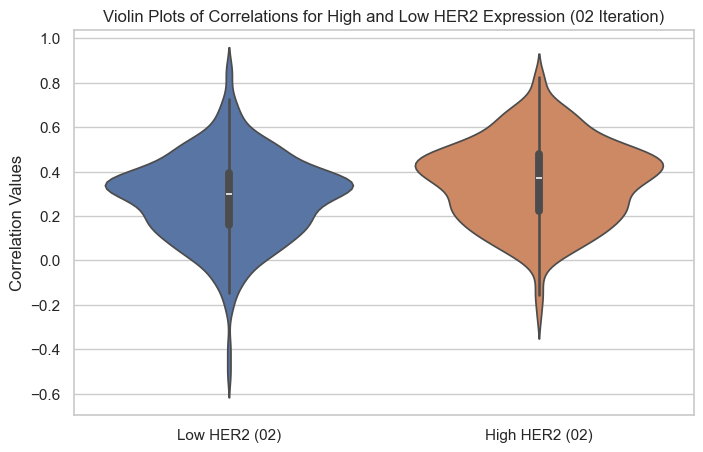

In [53]:
#Creating violin plot to look at relationship for low and high HER2 correlations for Iteration 02

violins1 = [correlations_low_02, correlations_high_02]

labels1 = ["Low HER2 (02)", "High HER2 (02)"]

plt.figure(figsize=(8, 5))
sns.violinplot(data=violins1)

plt.xticks(ticks=range(2), labels=labels1)
plt.title("Violin Plots of Correlations for High and Low HER2 Expression (02 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

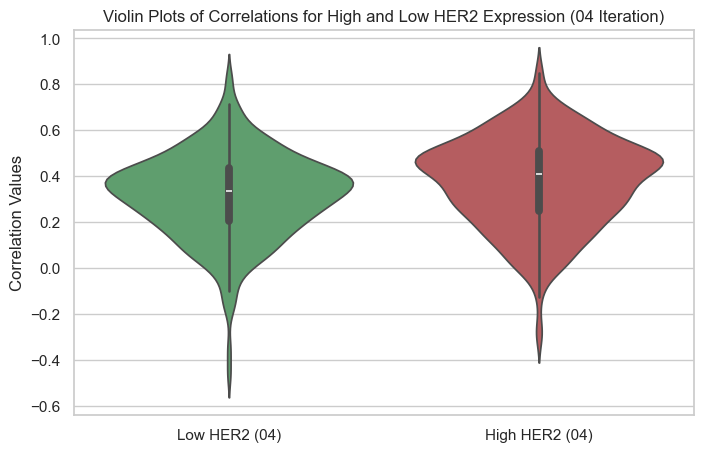

In [54]:
#Creating scatterplot to look at boxplos for low and high HER2 correlations for Iteration 04

violins2 = [correlations_low_04, correlations_high_04]

labels2 = ["Low HER2 (04)", "High HER2 (04)"]

default_colors = sns.color_palette("deep")
green_color = default_colors[2]
red_color = default_colors[3]

plt.figure(figsize=(8, 5))
sns.violinplot(data=violins2, palette=[green_color, red_color])

plt.xticks(ticks=range(2), labels=labels2)
plt.title("Violin Plots of Correlations for High and Low HER2 Expression (04 Iteration)")
plt.ylabel("Correlation Values")
plt.show()

In [56]:
#Rank sum test for 02 iteration

from scipy.stats import mannwhitneyu

def rank_sum_test(sample1, sample2, alternative='two-sided'):
    U_stat, p_value = mannwhitneyu(sample1, sample2, alternative=alternative)
    return U_stat, p_value

U_stat, p_value = rank_sum_test(correlations_low_02, correlations_high_02)
print(f"Statistic: {U_stat}, p-value: {p_value}")

Statistic: 117404.0, p-value: 4.178209180725444e-11


In [57]:
#Rank sum test for 04 iteration

from scipy.stats import mannwhitneyu

def rank_sum_test(sample1, sample2, alternative='two-sided'):
    U_stat, p_value = mannwhitneyu(sample1, sample2, alternative=alternative)
    return U_stat, p_value

U_stat, p_value = rank_sum_test(correlations_low_04, correlations_high_04)
print(f"Statistic: {U_stat}, p-value: {p_value}")

Statistic: 123608.0, p-value: 5.750690020817995e-08
